In [1]:
import numpy as np
from numpy.linalg import inv,norm
import matplotlib.pyplot as plt
import time as time


## 1

In [15]:
def norme1(x):
    return sum(abs(x[i]) for i in range(len(x)))

# Compute th prox of function f given gamma and x
def proxff(x,lamda):
    prox = np.zeros(x.shape)
    for i in range (len(x)):
        if x[i]<= -lamda:
            prox[i] = x[i] + lamda
        elif abs(x[i])<= lamda:
            prox[i] = 0
        else:
            prox[i] = x[i] - lamda
    return prox

In [26]:

def algo_1(A,b,lamda,gamma,ITER = 10**(4)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1)
    xx =[]
    xx.append(x)
    hh =[]
    k = 0 # iteration counter

    while k<ITER :
        k+=1
        x = proxff(x,lamda*gamma)
        hh.append(norm(x - xx[-1]))
        xx.append(x)
    end_time = time.time()
    elapsed_time = end_time - start_time   
    return hh,k,x,elapsed_time

******************************
Proximal gradient algorithm lambda = 0.1
iterations number:  100
elapsed_time:  0.01197361946105957 seconds
******************************


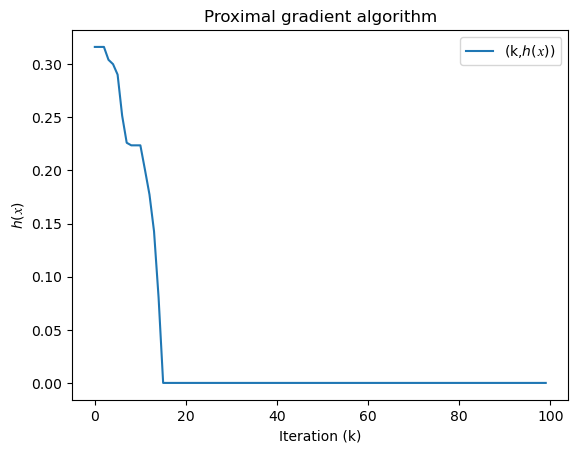

In [35]:
n = 10
A = 0*np.identity(n)
b = np.zeros((n,1))
# Proximal gradient algorithm
lamda = 0.1
gamma = 1
hh6, k6,x,elapsed_time= algo_1(A,b,lamda,gamma,100)
#print(normes6)
print("*" * 30)
print("Proximal gradient algorithm lambda = 0.1")
print("iterations number: ",k6)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( hh6, label='(k,ℎ($𝑥$))')
plt.title("Proximal gradient algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

******************************
Proximal gradient algorithm lambda = 0.3
iterations number:  100
elapsed_time:  0.012964248657226562 seconds
******************************


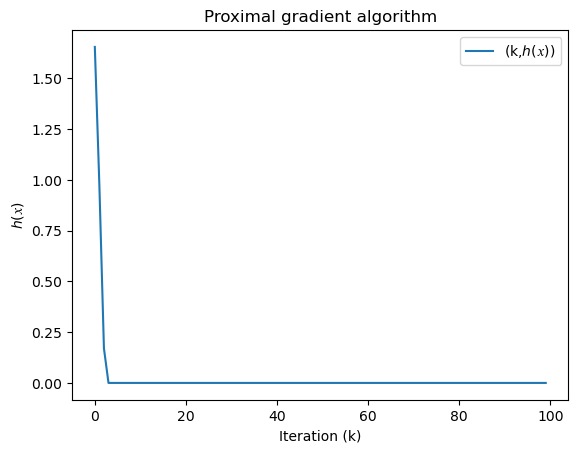

In [34]:
n = 10
A = np.identity(n)
b = np.zeros((n,1))
# Proximal gradient algorithm
lamda = 0.3
gamma = 1
hh6, k6,x,elapsed_time= prox_gradient_algo_3(A,b,lamda,gamma,100)
#print(normes6)
print("*" * 30)
print("Proximal gradient algorithm lambda = 0.3")
print("iterations number: ",k6)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( hh6, label='(k,ℎ($𝑥$))')
plt.title("Proximal gradient algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

## 3


-  $\textbf{Proximal gradient algorithm}$

Let $f: x \mapsto f(x) = \gamma ||x||_1$ and $g: x\mapsto \frac{1}{2}||Ax -b||^2$. $f \in\Gamma_0(\mathbb{R}^n)$ because, $ \gamma||.||_1$ is convex, $\gamma$-lipschitz and proper function

$f(x) = \gamma \|x\|_1 = \sum_{i=1}^{d} |x_i| = \sum_{i=1}^{d} f_i(x_i)$

$\texttt{prox}_{\lambda f}(x) = (\texttt{prox}_{\lambda f_1}(x_1),\dots,\texttt{prox}_{\lambda f_d}(x_d))$

$\texttt{prox}_{\lambda \gamma |.|}(x_i) = \begin{equation}
\left\{
\begin{aligned}
   x_i + \lambda\gamma \texttt{ if } x_i\le -\lambda\gamma\\
   0 \texttt{ if } |x_i| \le \lambda\gamma \\
   x_i - \lambda\gamma \texttt{ if } x_i\ge \lambda\gamma
\end{aligned}
\right.
\end{equation}
\texttt{ and } \nabla g(x) = A^T(Ax -b)
$




In [30]:

def prox_gradient_algo_3(A,b,lamda,gamma,ITER = 10**(4)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1)
    xx =[]
    xx.append(x)
    hh =[]
    k = 0 # iteration counter
    while k<ITER :
        k+=1
        x_1 = x - lamda*A.T@(A@x-b) # 𝑥−𝜆∇𝑔(𝑥)
        x = proxff(x_1,lamda*gamma)
        hh.append(norm(x - xx[-1]))
        xx.append(x)
    end_time = time.time()
    elapsed_time = end_time - start_time   
    return hh,k,x,elapsed_time

******************************
Proximal gradient algorithm
iterations number:  100
elapsed_time:  0.09798550605773926 seconds
******************************


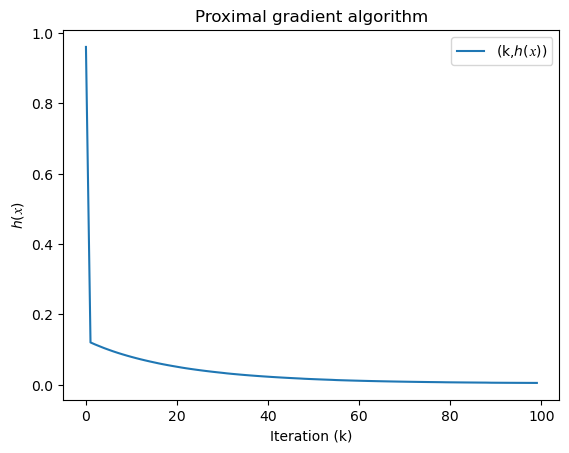

In [31]:
n = 10
m = 5
d = 100
A = np.random.randint(0,10,(n,d))
b = np.random.randint(0,10,(n,1))
gamma = 10
L = norm((A.T@A))

# Proximal gradient algorithm
hh6, k6,x,elapsed_time= prox_gradient_algo_3(A,b,1/L,gamma,100)
#print(normes6)
print("*" * 30)
print("Proximal gradient algorithm")
print("iterations number: ",k6)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( hh6, label='(k,ℎ($𝑥$))')
plt.title("Proximal gradient algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()